In [1]:
import pandas as pd
import numpy as np

In [2]:
loan = pd.read_csv('lending-club-data.csv', low_memory = False)

In [3]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122607 entries, 0 to 122606
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           122607 non-null  int64  
 1   member_id                    122607 non-null  int64  
 2   loan_amnt                    122607 non-null  int64  
 3   funded_amnt                  122607 non-null  int64  
 4   funded_amnt_inv              122607 non-null  int64  
 5   term                         122607 non-null  object 
 6   int_rate                     122607 non-null  float64
 7   installment                  122607 non-null  float64
 8   grade                        122607 non-null  object 
 9   sub_grade                    122607 non-null  object 
 10  emp_title                    115767 non-null  object 
 11  emp_length                   118516 non-null  object 
 12  home_ownership               122607 non-null  object 
 13 

In [6]:
loan['safe_loans'] = loan['bad_loans'].apply(lambda x : +1 if x==0 else -1)

In [7]:
loan.drop(['bad_loans'], axis = 1, inplace = True )

In [8]:
total_loans = len(loan)
print(total_loans)

122607


In [9]:
safe = len(loan[loan['safe_loans'] == 1])
print(safe)

99457


In [10]:
round(safe/total_loans*100)
print('percentage of safe loans: {0}'.format(round(safe/total_loans*100)))

percentage of safe loans: 81


In [11]:
risky = len(loan[loan['safe_loans'] == -1])
print(risky)

23150


In [12]:
round(risky/total_loans*100)
print('percentage of risky loans: {}'.format(round(risky/total_loans*100)))

percentage of risky loans: 19


Extract the feature columns and target column

In [13]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

In [14]:
target = 'safe_loans'  

In [15]:
loans = loan[features + [target]]

In [16]:
loans.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
0,B,B2,0,11,RENT,27.65,credit_card,36 months,1,1,83.7,0.00,1
1,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.00,-1
2,C,C5,0,11,RENT,8.72,small_business,36 months,1,1,98.5,0.00,1
3,C,C1,0,11,RENT,20.00,other,36 months,0,1,21.0,16.97,1
4,A,A4,0,4,RENT,11.20,wedding,36 months,1,1,28.3,0.00,1


### One-hot encoding

In [17]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()
# # enc.fit_transform(loans_data[['grade']])
# enc_df = pd.DataFrame(enc.fit_transform(loans_data[['grade']]).toarray())

In [18]:
# enc.categories_

In [19]:
# enc_df.head()

In [20]:
# dloans_data = loans_data.join(enc_df)

In [21]:
categorical_col = list(loans.select_dtypes('object').columns)
print(categorical_col)

['grade', 'sub_grade', 'home_ownership', 'purpose', 'term']


In [22]:
loans

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
0,B,B2,0,11,RENT,27.65,credit_card,36 months,1,1,83.7,0.00,1
1,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.00,-1
2,C,C5,0,11,RENT,8.72,small_business,36 months,1,1,98.5,0.00,1
3,C,C1,0,11,RENT,20.00,other,36 months,0,1,21.0,16.97,1
4,A,A4,0,4,RENT,11.20,wedding,36 months,1,1,28.3,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122602,E,E5,1,0,MORTGAGE,1.50,medical,60 months,0,0,14.6,0.00,-1
122603,D,D2,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,0,15.2,0.00,1
122604,D,D3,0,6,MORTGAGE,12.28,medical,60 months,0,0,10.7,0.00,-1
122605,D,D5,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,1,46.3,0.00,-1


In [23]:
d = pd.get_dummies(loans['grade'], prefix = 'grade')
d

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
122602,0,0,0,0,1,0,0
122603,0,0,0,1,0,0,0
122604,0,0,0,1,0,0,0
122605,0,0,0,1,0,0,0


In [24]:
for feature in categorical_col:
    dummy = pd.get_dummies(loans[feature], prefix = feature)
    loans = loans.join(dummy)
    loans.drop(feature, axis = 1, inplace = True)

In [25]:
loans.columns

Index(['short_emp', 'emp_length_num', 'dti', 'last_delinq_none',
       'last_major_derog_none', 'revol_util', 'total_rec_late_fee',
       'safe_loans', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'purpose_car', 'purpose_credit_card'

In [26]:
loans.head()

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans,grade_A,grade_B,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,0,11,27.65,1,1,83.7,0.00,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1.00,1,1,9.4,0.00,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,11,8.72,1,1,98.5,0.00,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,11,20.00,0,1,21.0,16.97,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,4,11.20,1,1,28.3,0.00,1,1,0,...,0,0,0,0,0,0,0,1,1,0


In [27]:
import json

In [28]:
with open('module-5-assignment-1-train-idx.json') as file:
    train_idx = json.load(file)

In [29]:
with open('module-5-assignment-1-validation-idx.json') as file:
    validate_idx = json.load(file)

In [30]:
train_data = loans.iloc[train_idx]

In [31]:
validation_data = loans.iloc[validate_idx]

In [32]:
train_data.head()

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans,grade_A,grade_B,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
1,1,1,1.00,1,1,9.4,0.0,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,5,5.55,1,1,32.6,0.0,-1,0,0,...,0,0,0,0,0,1,0,0,0,1
7,1,1,18.08,1,1,36.5,0.0,-1,0,1,...,0,0,0,0,1,0,0,0,0,1
10,1,1,10.08,1,1,91.7,0.0,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
12,0,4,7.06,1,1,55.5,0.0,-1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [33]:
validation_data.tail()

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans,grade_A,grade_B,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
122390,0,11,19.76,0,1,70.1,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
122419,0,8,15.70,0,1,38.7,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
122445,1,1,7.56,1,1,55.3,0.0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
122461,0,8,6.93,0,0,28.1,15.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
122480,1,0,4.00,1,1,13.5,0.0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
train_data['safe_loans']

1        -1
6        -1
7        -1
10       -1
12       -1
         ..
122572    1
122575    1
122588    1
122599    1
122603    1
Name: safe_loans, Length: 37224, dtype: int64

In [35]:
len(train_idx)

37224

In [36]:
len(validate_idx)

9284

In [37]:
len(loans[loans[target]==1])

99457

In [38]:
len(loans[loans[target]== -1])

23150

In [39]:
print(f'number of safe loans: {safe}')
print(f'number of risky loans: {risky}')

number of safe loans: 99457
number of risky loans: 23150


In [40]:
print(f'train data: {train_data.shape}')
print(f'train data: {train_data.shape}')

train data: (37224, 68)
train data: (37224, 68)


### Converting data into numpy array

In [41]:
def get_numpy_data(dataframe, features, target):
    dataframe.loc[:,'constant'] = 1
    features = ['constant'] + features
#     features_data = dataframe[features]
    features_array = dataframe[features].to_numpy()
#     target_data = dataframe[target]
    target_array = dataframe[target].to_numpy()
    return(features_array, target_array)

In [42]:
feature_list = list(loans.columns)
feature_list.remove(target)

In [43]:
print(feature_list)

['short_emp', 'emp_length_num', 'dti', 'last_delinq_none', 'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose

In [44]:
train_features, train_target = get_numpy_data(train_data,feature_list, target )

c:\users\rituraj\virtual-env\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\rituraj\virtual-env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [45]:
train_features

array([[ 1.,  1.,  1., ...,  0.,  0.,  1.],
       [ 1.,  0.,  5., ...,  0.,  0.,  1.],
       [ 1.,  1.,  1., ...,  0.,  0.,  1.],
       ...,
       [ 1.,  0.,  4., ...,  0.,  1.,  0.],
       [ 1.,  0., 11., ...,  0.,  0.,  1.],
       [ 1.,  0., 11., ...,  0.,  1.,  0.]])

In [46]:
train_target

array([-1, -1, -1, ...,  1,  1,  1], dtype=int64)

In [47]:
validation_features, validation_target = get_numpy_data(validation_data, feature_list, target)

In [48]:
validation_features

array([[ 1.,  0.,  3., ...,  0.,  0.,  1.],
       [ 1.,  0., 11., ...,  0.,  1.,  0.],
       [ 1.,  0.,  5., ...,  0.,  0.,  1.],
       ...,
       [ 1.,  1.,  1., ...,  0.,  1.,  0.],
       [ 1.,  0.,  8., ...,  0.,  1.,  0.],
       [ 1.,  1.,  0., ...,  0.,  1.,  0.]])

In [49]:
validation_target

array([-1, -1, -1, ...,  1,  1,  1], dtype=int64)

### Build a decision tree classifier

In [50]:
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtc = DecisionTreeClassifier(max_depth = 6)
decision_tree_model = dtc.fit(train_features, train_target)

In [52]:
dtc_small = DecisionTreeClassifier(max_depth = 2)
small_model  = dtc_small.fit(train_features, train_target)

In [53]:
import matplotlib.pyplot as plt

[Text(1518.515625, 2019.0857142857144, 'X[8] <= 0.5\ngini = 0.5\nsamples = 37224\nvalue = [18476, 18748]'),
 Text(817.3828125, 1708.457142857143, 'X[9] <= 0.5\ngini = 0.497\nsamples = 32094\nvalue = [17218, 14876]'),
 Text(428.671875, 1397.8285714285716, 'X[7] <= 0.005\ngini = 0.483\nsamples = 21728\nvalue = [12875, 8853]'),
 Text(232.5, 1087.2, 'X[10] <= 0.5\ngini = 0.488\nsamples = 20500\nvalue = [11810, 8690]'),
 Text(116.25, 776.5714285714287, 'X[3] <= 18.205\ngini = 0.465\nsamples = 11559\nvalue = [7302, 4257]'),
 Text(58.125, 465.9428571428573, 'X[67] <= 0.5\ngini = 0.485\nsamples = 6369\nvalue = [3735, 2634]'),
 Text(29.0625, 155.3142857142857, 'gini = 0.497\nsamples = 3498\nvalue = [1876, 1622]'),
 Text(87.1875, 155.3142857142857, 'gini = 0.456\nsamples = 2871\nvalue = [1859, 1012]'),
 Text(174.375, 465.9428571428573, 'X[11] <= 0.5\ngini = 0.43\nsamples = 5190\nvalue = [3567, 1623]'),
 Text(145.3125, 155.3142857142857, 'gini = 0.395\nsamples = 2422\nvalue = [1766, 656]'),
 Text

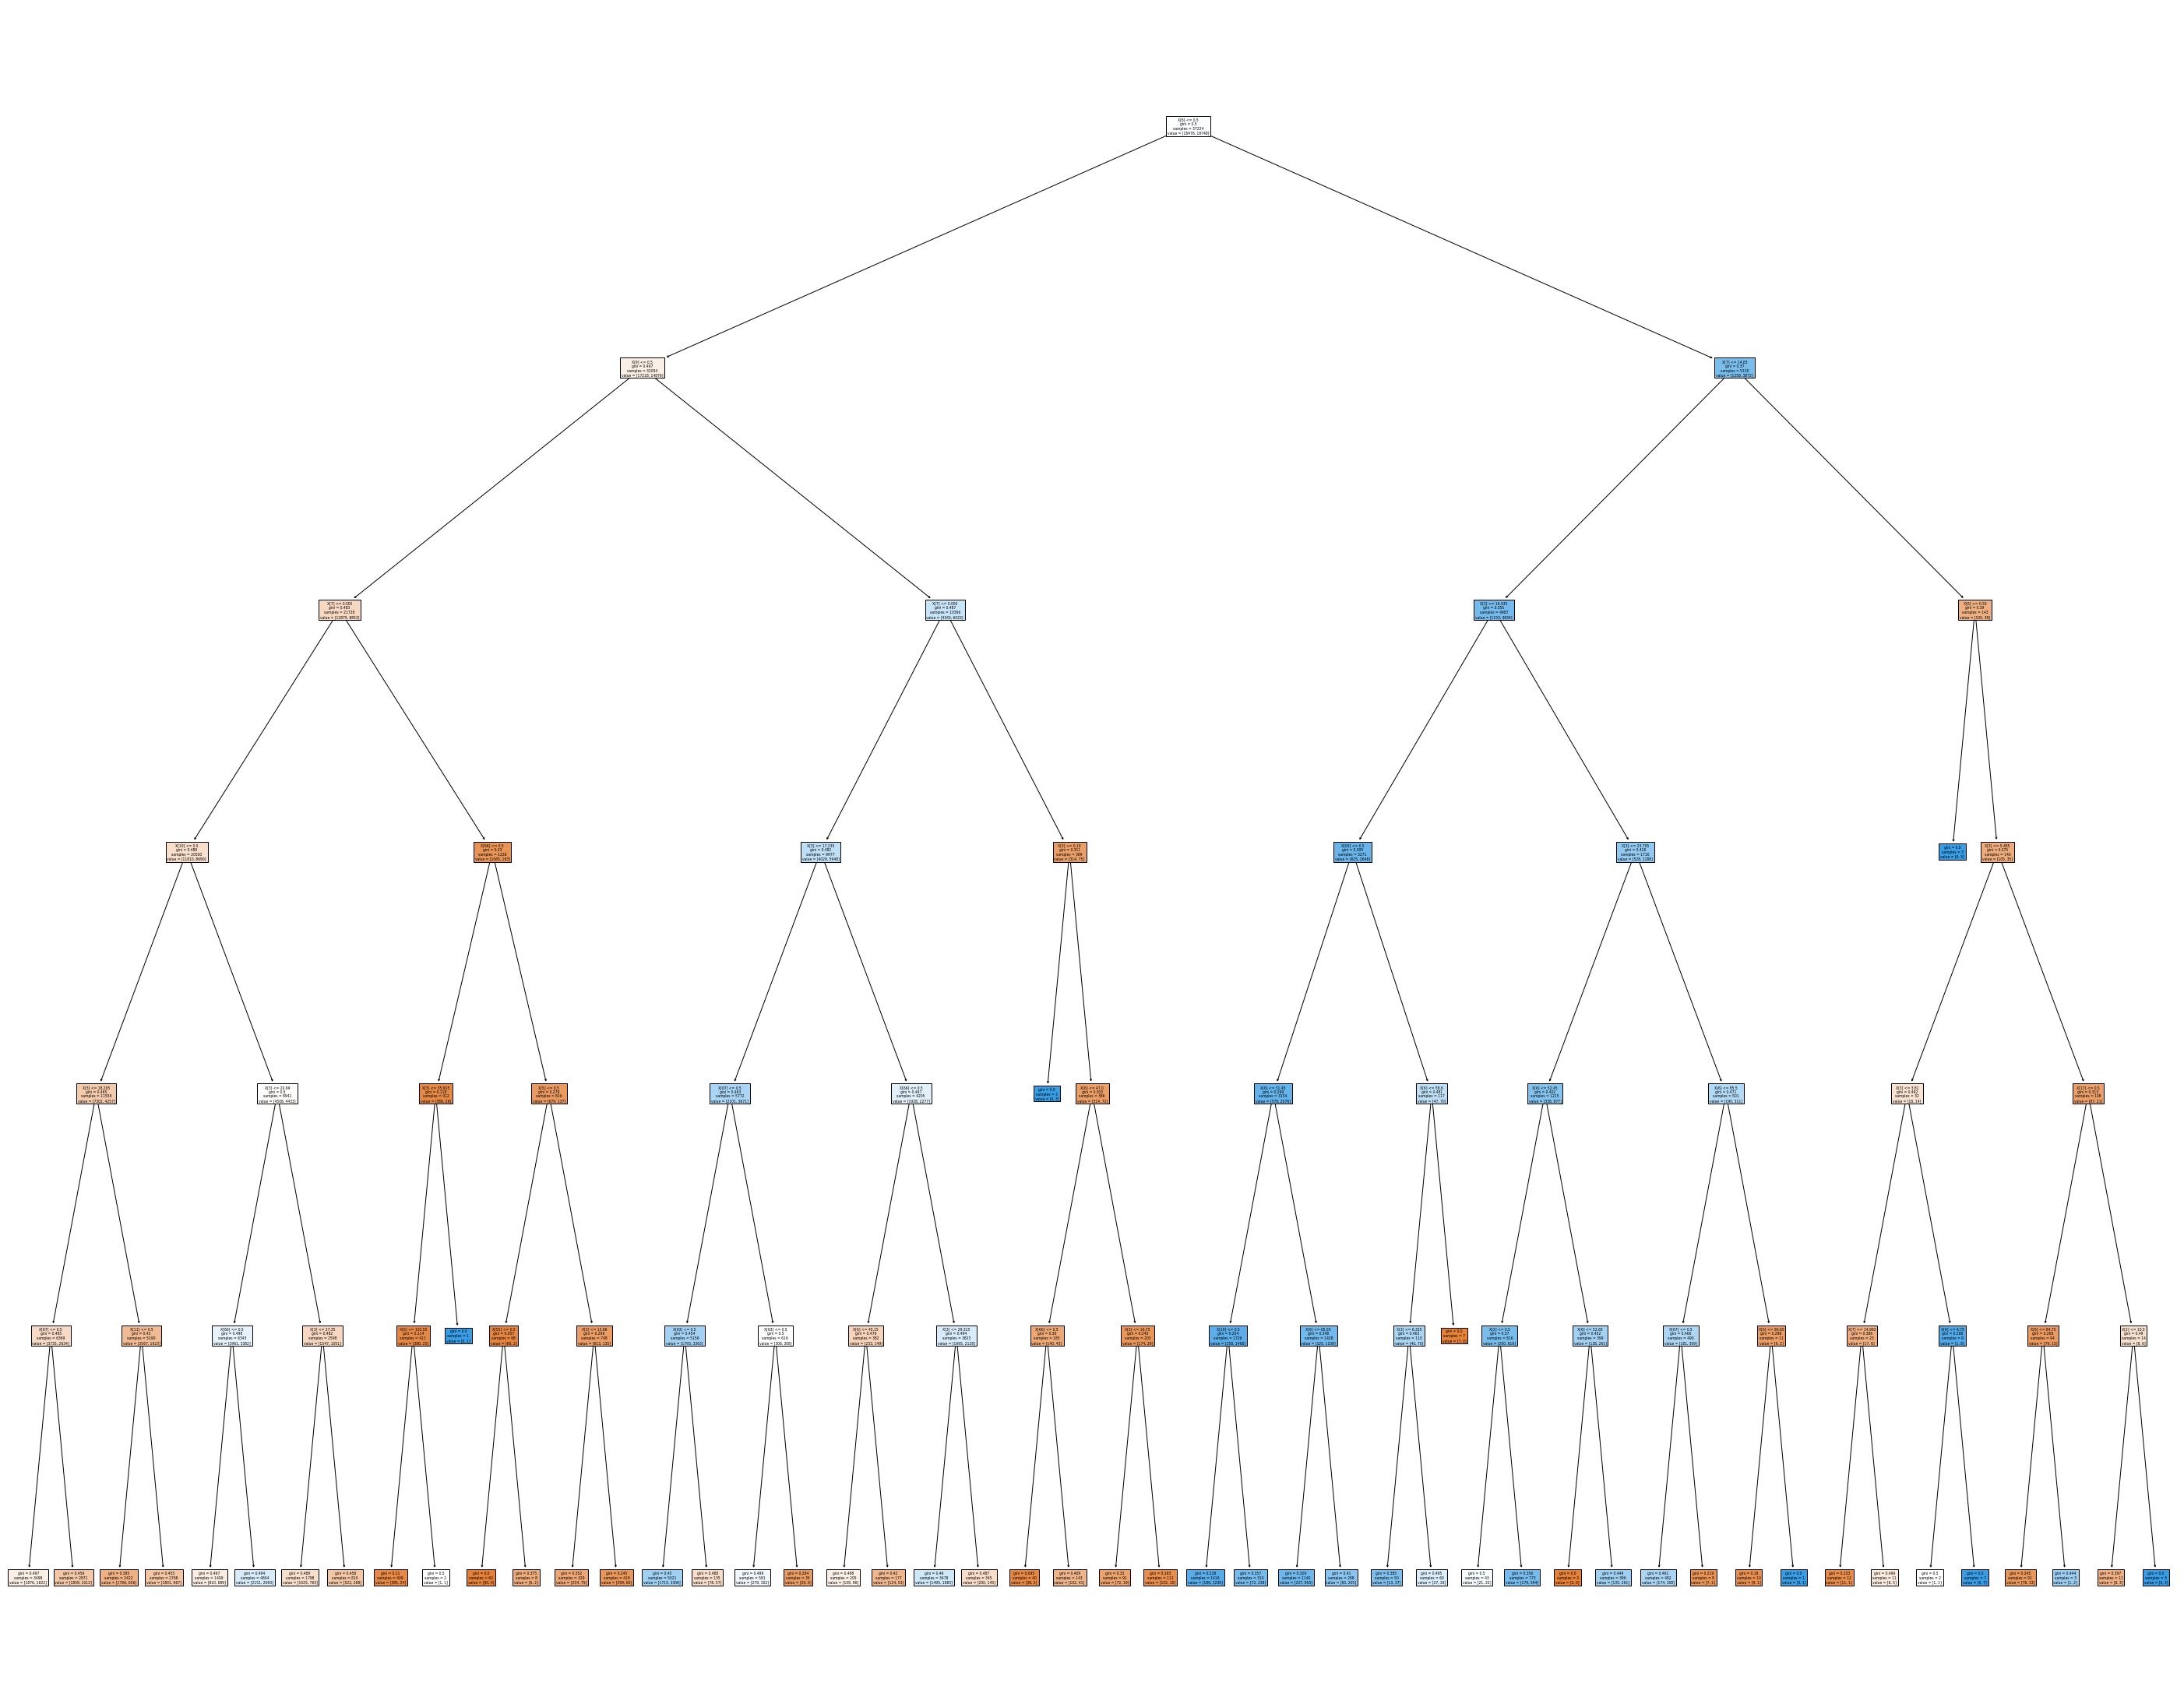

In [84]:
fig = plt.figure(figsize = (50,40))
sklearn.tree.plot_tree(decision_tree_model, filled=True)

[Text(697.5, 906.0, 'grade_B <= 0.5\ngini = 0.5\nsamples = 37224\nvalue = [18476, 18748]'),
 Text(348.75, 543.6, 'grade_C <= 0.5\ngini = 0.497\nsamples = 32094\nvalue = [17218, 14876]'),
 Text(174.375, 181.19999999999993, 'gini = 0.483\nsamples = 21728\nvalue = [12875, 8853]'),
 Text(523.125, 181.19999999999993, 'gini = 0.487\nsamples = 10366\nvalue = [4343, 6023]'),
 Text(1046.25, 543.6, 'grade_A <= 14.83\ngini = 0.37\nsamples = 5130\nvalue = [1258, 3872]'),
 Text(871.875, 181.19999999999993, 'gini = 0.355\nsamples = 4987\nvalue = [1153, 3834]'),
 Text(1220.625, 181.19999999999993, 'gini = 0.39\nsamples = 143\nvalue = [105, 38]')]

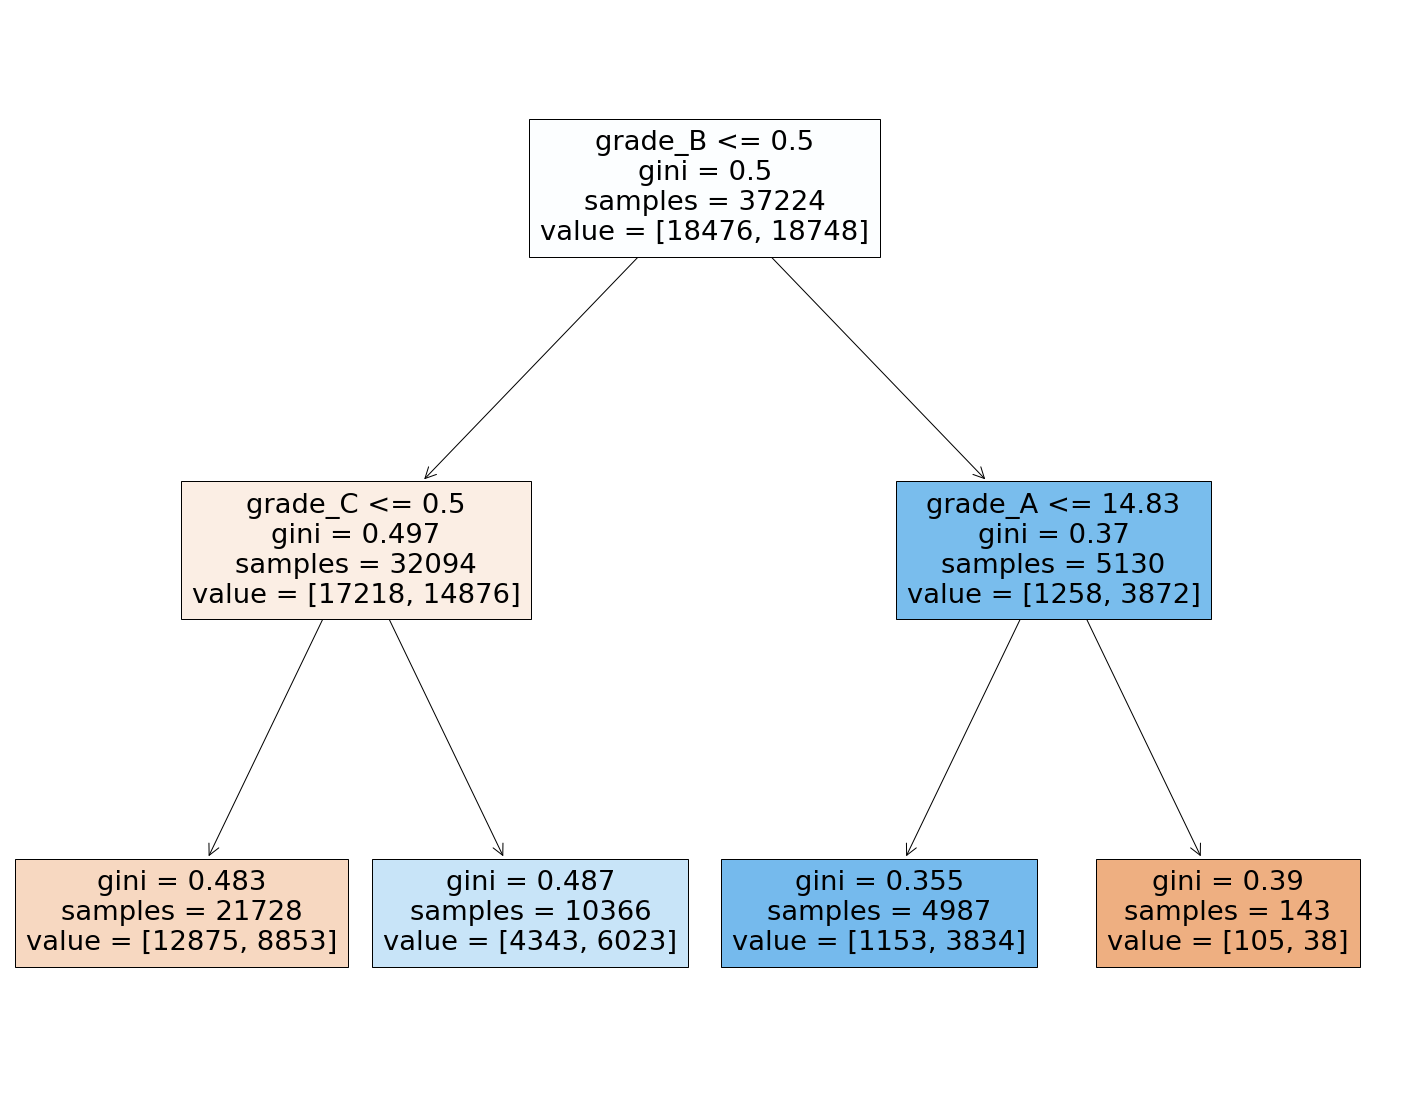

In [58]:
fig = plt.figure(figsize = (25,20))
sklearn.tree.plot_tree(small_model, feature_names= feature_list, filled=True)

### Making predictions

Let's consider two positive and two negative examples from the validation set and see what the model predicts. We will do the following:

Predict whether or not a loan is safe.

Predict the probability that a loan is safe.

First, let's grab 2 positive examples and 2 negative examples.

In [59]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans,grade_A,grade_B,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,constant
19,0,11,11.18,1,1,82.4,0.0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
79,0,10,16.85,1,1,96.4,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
24,0,3,13.97,0,1,59.5,0.0,-1,0,0,...,0,0,0,1,0,0,0,0,1,1
41,0,11,16.33,1,1,62.1,0.0,-1,1,0,...,0,0,0,0,0,0,0,1,0,1


In [60]:
sample_validation_data[target]

19    1
79    1
24   -1
41   -1
Name: safe_loans, dtype: int64

In [61]:
sample_validation_features, sample_validation_target = get_numpy_data(sample_validation_data, feature_list, target)

In [62]:
sample_validation_target

array([ 1,  1, -1, -1], dtype=int64)

In [63]:
sample_validation_features

array([[ 1.  ,  0.  , 11.  , 11.18,  1.  ,  1.  , 82.4 ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [ 1.  ,  0.  , 10.  , 16.85,  1.  ,  1.  , 96.4 ,  0.  ,  0.  ,
         0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ,  0. 

In [64]:
sample_validation_predicted = decision_tree_model.predict(sample_validation_features)

In [65]:
sample_validation_predicted

array([ 1, -1, -1,  1], dtype=int64)

### Quiz 1:

In [66]:
(sample_validation_predicted == sample_validation_target).sum()/len(sample_validation_target)

0.5

#### What percentage of the predictions on sample_validation_data did decision_tree_model get correct?
##### ans = 50%

In [67]:
decision_tree_model.predict_proba(sample_validation_features)

array([[0.34156543, 0.65843457],
       [0.53630646, 0.46369354],
       [0.64750958, 0.35249042],
       [0.20789474, 0.79210526]])

### Quiz 2
#### Question 2
Which loan has the highest probability of being classified as a safe loan?
#### ans --> 4th

### Tricky predictions!

what is the probability (according to small_model) of a loan being classified as safe

In [68]:
small_model_prediction =  small_model.predict(sample_validation_features)

In [69]:
small_model_prediction

array([ 1, -1, -1,  1], dtype=int64)

### Quiz Question: 
#### Notice that the probability preditions are the exact same for the 2nd and 3rd loans. Why would this happen?
#### ans --> 

### Visualize the prediction on a tree

In [75]:
len(feature_list)

67

In [71]:
sample_validation_data

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans,grade_A,grade_B,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,constant
19,0,11,11.18,1,1,82.4,0.0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
79,0,10,16.85,1,1,96.4,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
24,0,3,13.97,0,1,59.5,0.0,-1,0,0,...,0,0,0,1,0,0,0,0,1,1
41,0,11,16.33,1,1,62.1,0.0,-1,1,0,...,0,0,0,0,0,0,0,1,0,1


### Evaluating accuracy of the decision tree model

In [85]:
validation_predicted_on_decision_tree_model = decision_tree_model.predict(validation_features)

In [92]:
total_correct_prediction = (validation_target == validation_predicted_on_decision_tree_model).sum()

In [95]:
accuracy = total_correct_prediction/len(validation_target)
print(round(accuracy,2))

0.64


In [96]:
decision_tree_model.score(validation_features, validation_target)

0.6363636363636364

In [111]:
decision_tree_model.score(train_features, train_target)

0.6405276165914464

### Quiz Question 5:
What is the accuracy of decision_tree_model on the validation set, rounded to the nearest .01?
Ans --> 0.64

### Evaluating accuracy of a complex decision tree model

train a large decision tree with max_depth=10.

In [97]:
big_clf = DecisionTreeClassifier(max_depth = 10)
big_model = big_clf.fit(train_features, train_target)

In [99]:
train_predicted = big_model.predict(train_features)

In [101]:
correctly_predicted_train = (train_predicted==train_target).sum()

In [104]:
train_accuracy = correctly_predicted_train/len(train_predicted)
print(train_accuracy)

0.6637384483129164


In [105]:
validation_predicted = big_model.predict(validation_features)

In [106]:
correctly_predicted_validaction = (validation_predicted==validation_target).sum()

In [108]:
validation_accuracy = correctly_predicted_validaction/len(validation_predicted)
print(validation_accuracy)

0.6265618267987936


In [110]:
big_model.score(train_features, train_target)

0.6637384483129164

In [109]:
big_model.score(validation_features, validation_target)

0.6265618267987936

### Question 5
How does the performance of big_model on the validation set compare to decision_tree_model on the validation set? Is this a sign of overfitting?

Ans = Big_model has higher accuracy on the validation set than decision_tree_model. This is not overfitting.

In [113]:
validation_prodicted = decision_tree_model.predict(validation_features)

In [114]:
validation_prodicted

array([-1,  1, -1, ..., -1, -1,  1], dtype=int64)

In [126]:
print(validation_prodicted == 1)

[False  True False ... False False  True]


In [132]:
validation_target

array([-1, -1, -1, ...,  1,  1,  1], dtype=int64)

In [123]:
false_positives = ((validation_prodicted==1) * (validation_target==-1)).sum()
print(false_positives)

1661


In [130]:
(validation_prodicted == 1)*(validation_target == -1)

array([False,  True, False, ..., False, False, False])

In [139]:
false_negatives = ((validation_prodicted==-1) * (validation_target==1)).sum()
print(false_negatives)

1715


In [136]:
False_positives = 0
False_negatives = 0
for i in range(len(validation_target)):
    if validation_prodicted[i] == 1 and validation_target[i] == -1:
        False_positives +=1
    if validation_prodicted[i] == -1 and validation_target[i] == +1:
        False_negatives +=1

In [137]:
False_positives

1661

In [138]:
False_negatives

1715

In [140]:
correct_prediction = (validation_prodicted ==validation_target).sum()
print(correct_prediction)

5908


In [141]:
print(10000 * False_negatives + 20000 * False_positives)

50370000
